# Lab 4

## Part 1:  Questions

---
### 1. 
Why is it important to scale the inputs when using SVMs?

Feature scaling or normalization are not required but it is recommended because it can significantly improve model performance and convergence speed. SVM tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate the other features when calculating the distance, and it may give undue importance to features with larger magnitudes. So if you rescale all features, they have the same influence on the distance metric. SVM algorithms also converge quicker when the features are on similar scales. 


---
### 2. 
Say you've trained an SVM classifier with an RBF kernel, but it seems to **underfit** the training set.  
* Should you increase or decrease $\gamma$ (gamma)?
* What about $C$?

Because it is underfitting the training set, there might be too much regularization. To decrease the regularization, you need to either increase gamma or increase C. Or you can increase both. 

When you increase Gamma, it makes the decision boundary more sensitive to each data point with brings more complex and flexible decisio boundaries. This can help the model better fit the training data. 

---
### 3. 
If a decision tree is **overfitting** the training set, is a good idea to try decreasing `max_depth`?

Yes, because it will constrain the model and help regularize it. 

---

### 4.
If a decision tree is **underfitting** the training set, is it a good idea to try scaling the input features?

No. Decision trees don't care whether or not the training data is scaled or centered, so scaling the input features will just be a waste of time. 

---
### 5.
Consider the Gini index, classification error (1-accuracy), and cross entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.  
    * *Note* In a setting with two classes, $\hat{p}_{m1} = 1 - \hat{p}_{m2}$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

p_hat_m1 = np.linspace(0,1,100)
p_hat_m2 = 1 - p_hat_m1

gini_values = 2 * p_hat_m1 * p_hat_m2
classification_error = 1 - np.maximum(p_hat_m1, p_hat_m2)
cross_entropy = (p_hat_m1 * np.log(p_hat_m1) + (p_hat_m2) * np.log(p_hat_m2))


[        nan -0.05646517 -0.0988243  -0.13579396 -0.16922609 -0.19999966
 -0.22863187 -0.25546409 -0.28073856 -0.3046361  -0.32729674 -0.3488321
 -0.36933312 -0.38887531 -0.40752228 -0.42532829 -0.44234015 -0.45859859
 -0.47413931 -0.48899388 -0.5031903  -0.51675359 -0.5297062  -0.54206833
 -0.55385823 -0.56509245 -0.57578602 -0.58595262 -0.59560472 -0.60475373
 -0.61341005 -0.62158321 -0.62928193 -0.63651417 -0.64328722 -0.64960773
 -0.65548177 -0.66091485 -0.66591197 -0.67047765 -0.67461594 -0.67833046
 -0.68162443 -0.68450066 -0.68696158 -0.68900924 -0.69064535 -0.69187126
 -0.69268797 -0.69309616 -0.69309616 -0.69268797 -0.69187126 -0.69064535
 -0.68900924 -0.68696158 -0.68450066 -0.68162443 -0.67833046 -0.67461594
 -0.67047765 -0.66591197 -0.66091485 -0.65548177 -0.64960773 -0.64328722
 -0.63651417 -0.62928193 -0.62158321 -0.61341005 -0.60475373 -0.59560472
 -0.58595262 -0.57578602 -0.56509245 -0.55385823 -0.54206833 -0.5297062
 -0.51675359 -0.5031903  -0.48899388 -0.47413931 -0.4

/var/folders/m7/2wbj3vkn03d65h0jqbt8t86w0000gn/T/ipykernel_52190/811403805.py:9: RuntimeWarning: divide by zero encountered in log
  cross_entropy = (p_hat_m1 * np.log(p_hat_m1) + (p_hat_m2) * np.log(p_hat_m2))
/var/folders/m7/2wbj3vkn03d65h0jqbt8t86w0000gn/T/ipykernel_52190/811403805.py:9: RuntimeWarning: invalid value encountered in multiply
  cross_entropy = (p_hat_m1 * np.log(p_hat_m1) + (p_hat_m2) * np.log(p_hat_m2))


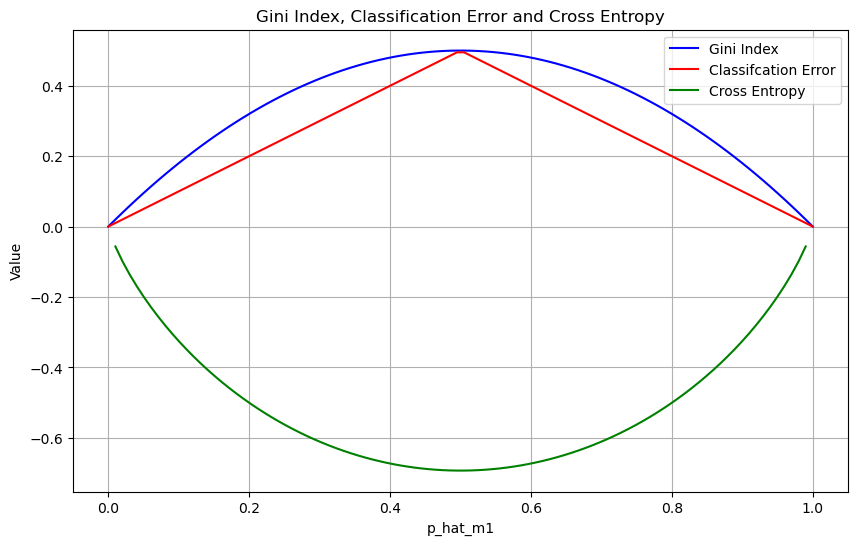

In [8]:
plt.figure(figsize = (10,6))
plt.plot(p_hat_m1, gini_values, label = 'Gini Index', color = 'blue')
plt.plot(p_hat_m1, classification_error, label = 'Classifcation Error', color = 'red')
plt.plot(p_hat_m1, cross_entropy, label = 'Cross Entropy', color = 'green')

plt.xlabel('p_hat_m1')
plt.ylabel('Value')
plt.title('Gini Index, Classification Error and Cross Entropy')
plt.legend()

plt.grid()
plt.show()

---
### 6. 
Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): $$0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, \text{and } 0.75$$ There are two common ways to combine these results together into a single class prediction. One is the majority vote approach. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

In [9]:
import numpy as np 
probabilities = [.1, .15, .2, .2, .55, .6, .6, .65, .7, .75]

majority_vote = sum(1 for p in probabilities if p > .5) > len(probabilities) / 2

if majority_vote:
    print("Majority Vote Approach: Red")
else: 
    print("Majority Vote Approach: Green")

Majority Vote Approach: Red


In [10]:
average_probability = np.mean(probabilities)
average_classification = average_probability >= .5

if average_classification:
    print("Average Probability Approach: Red")
else:
    print("Average Probability Approach: Green")


Average Probability Approach: Green


---
### 7.
In the context of ensemble learning, what is the difference between hard and soft voting? 

Hard voting involves taking the sum of predictions for every class label and then predicting the class label that has the most votes. It's determined by majority vote. Soft voting is taking the sum of the predicted probabilities for each class label and then predicting the class label with the largest probability. It's determined by the highest average probability. 

---
### 8.
If your AdaBoost ensemble overfits the training data, which hyperparameters should you tweak, and how?

You could reduce the number of estimators. Having a higher number of estimators can sometimes lead to overfitting if the model becomes too complex. 

You could tweak the base estimator complexity by making it more simple - like using a shallow decision tree or a linear model. Increase the regularization hyperparameters of the base estimator.

You could reduce the learning rate which will slow down the learning process and reduce the risk of overfitting. 


---
### 9.
If your gradient boosting ensemble overfits the training set, should you increase or decrease the learning rate? 

Decrease the learning rate. And do early stopping to find the right number of predictors because you probably just have too many. 

---
---
## Part 2: Random Forest
---


### 10.
Write a function that implements a Random Forest classifier from scratch.  Your function should take as input `X` and `y` (which are objects of the same type that Scikit-Learn would expect), `ntrees` (the number of trees to build), `max_depth` (the maximum depth of a single tree), and a flag to indicate if the function should do classification or regression. 

An example set up:

```python
def random_forest_classifier(X, y, ntrees, max_depth, classification=True):
    pass
```
All other arguments and hyperparameters can be considered fixed.  

Your function should: 
* Bootstrap the dataset (randomly sample the dataset with replacement)
* Train decision trees to each the bootstrapped sample using `DecisionTreeClassifer` or `DecisionTreeRegressor`
* Consider only a random subset of features for each split 
* Aggregate predictions to obtain the final classification prediction
* Compute the importance scores for each feature
* Compute the out-of-bag accuracy (classification) or $R^2$ (regression)
* Return a list of all the tree objects, the importance scores, the out-of-bag score, and the predictions for the input Xs

An example function call:
```python
trees, importances, oob, ypred = random_forest_classifier(X, y, ntrees=150, max_depth=5, classification=True)
```

You are not allowed to import any libraries or functions other than the ones shown below.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
from sklearn.metrics import accuracy_score, r2_score


In [ ]:
# write the function in "random_forest.py" file

---
### 11. 
Test your function by classifying the species of a penguin.  Use the code below to import and process the data. The target is the column called `species` and the features are the remaining columns after running the code below.  Compare the training accuracy, OOB accuracy, and feature importances with Scikit-Learn's native `RandomForestClassifier`.

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from seaborn import load_dataset
from random_forest import random_forest
df = load_dataset("penguins")
df = df.dropna()
df['female'] = (df['sex']=='Female').astype(int)
df = df.drop(['island','sex'], axis=1)

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,female
0,Adelie,39.1,18.7,181.0,3750.0,0
1,Adelie,39.5,17.4,186.0,3800.0,1
2,Adelie,40.3,18.0,195.0,3250.0,1
4,Adelie,36.7,19.3,193.0,3450.0,1
5,Adelie,39.3,20.6,190.0,3650.0,0


In [23]:

# Split the dataset into features (X) and the target variable (y)
X = df.drop("species", axis=1)
y = df["species"]

# Convert the target labels to integers
y = pd.Categorical(y)
y = y.codes

# Train a random forest using your custom function
ntrees = 100  # You can adjust the number of trees and max_depth as needed
max_depth = 5
trees, importances, oob, ypred = random_forest(X, y, ntrees, max_depth, classification=True)

# Calculate training accuracy with your custom function
y_pred_custom = np.round(ypred.mean(axis=1)).astype(int)
accuracy_custom = np.mean(y_pred_custom == y)
print(f"Custom Random Forest Training Accuracy: {accuracy_custom:.2f}")

# Train a RandomForestClassifier from Scikit-Learn
clf = RandomForestClassifier(n_estimators=ntrees, max_depth=max_depth, random_state=0)
clf.fit(X, y)

# Calculate training accuracy with Scikit-Learn
y_pred_sklearn = clf.predict(X)
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Scikit-Learn Random Forest Training Accuracy: {accuracy_sklearn:.2f}")

# Display results
print(f"Custom Random Forest OOB Accuracy: {oob:.2f}")
print("Custom Random Forest Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")

KeyError: "None of [Int64Index([205,  91, 324, 315, 242, 155,  96, 208,  31, 279,\n            ...\n            195, 285, 271, 313, 309, 284, 207, 184, 261, 218],\n           dtype='int64', length=333)] are in the [columns]"

---
### 12.
Test your function by predicting the tip.  Use the code below to import and process the data. The target is the column called `tip` and the features are the remaining columns after running the code below. Compare the training $R^2$, OOB $R^2$, and feature importances with Scikit-Learn's native `RandomForestRegressor`.

In [24]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd
from random_forest import random_forest  # Replace with the actual name of your function file

tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, drop_first=True)


In [25]:
X = tips.drop("tip", axis=1)
y = tips["tip"]

# Train a random forest using your custom function (Regression)
ntrees = 100  # You can adjust the number of trees and max_depth as needed
max_depth = 5
trees, importances, oob, ypred = random_forest(X.values, y.values, ntrees, max_depth, classification=False)

# Calculate training R-squared with your custom function
y_pred_custom = ypred.mean(axis=1)
r2_custom = 1 - (np.sum((y - y_pred_custom) ** 2) / np.sum((y - np.mean(y)) ** 2))
print(f"Custom Random Forest Training R^2: {r2_custom:.2f}")

# Train a RandomForestRegressor from Scikit-Learn
clf = RandomForestRegressor(n_estimators=ntrees, max_depth=max_depth, random_state=0)
clf.fit(X, y)

# Calculate training R-squared with Scikit-Learn
y_pred_sklearn = clf.predict(X)
r2_sklearn = clf.score(X, y)
print(f"Scikit-Learn Random Forest Training R^2: {r2_sklearn:.2f}")

# Display results
print(f"Custom Random Forest OOB R^2: {oob:.2f}")
print("Custom Random Forest Feature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.3f}")


Custom Random Forest Training R^2: -4.72
Scikit-Learn Random Forest Training R^2: 0.74
Custom Random Forest OOB R^2: nan
Custom Random Forest Feature Importances:
total_bill: 23.708
size: 19.871
sex_Female: 8.337
smoker_No: 7.448
day_Fri: 8.484
day_Sat: 8.162
day_Sun: 9.907
time_Dinner: 14.083


/Users/marynydegger/anaconda3/envs/stat386/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/marynydegger/anaconda3/envs/stat386/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/marynydegger/anaconda3/envs/stat386/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/marynydegger/anaconda3/envs/stat386/lib/python3.10/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/marynydegger/anaconda3/envs/stat386/lib/python3.10/si

---
---
## Part 3: Fashion MNist

For this problem, use the Fashion MNist dataset again.  Load the data and break into training and test sets in the way we did in the previous lab, only this time you can also read in the last 10000.  `train` should be use for training models, `test` should be used as the test data, and `final_test` should be used for final model evaluation in problem XX. 
```
from sklearn.datasets import fetch_openml
fashion_mnist_id=40996
X,y = fetch_openml(data_id=40996, return_X_y=True, as_frame=False, parser='auto')
X = X/255  # scale the date to be between 0 and 1
X_train, X_test, X_final_test = X[:50000], X[50000:60000], X[60000:]
y_train, y_test, y_final_test = y[:50000], y[50000:60000], y[60000:]

```

---
### 13.
If you didn't fit a random forest in the previous lab, fit one now. If you DID fit a random forest, re-fit in now. 

Report your training and testing accuracy.  Also make an image of the feature importances for each pixel (one image).   


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

fashion_mnist_id = 40996

# Load the Fashion MNIST dataset
X, y = fetch_openml(data_id=fashion_mnist_id, return_X_y=True, as_frame=False, parser='auto')

# Scale the data to be between 0 and 1
X = X / 255

# Split the data into training, test, and final test sets
X_train, X_test, X_final_test = X[:50000], X[50000:60000], X[60000:]
y_train, y_test, y_final_test = y[:50000], y[50000:60000], y[60000:]


In [27]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.88


Training Accuracy: 1.00
Testing Accuracy: 0.88


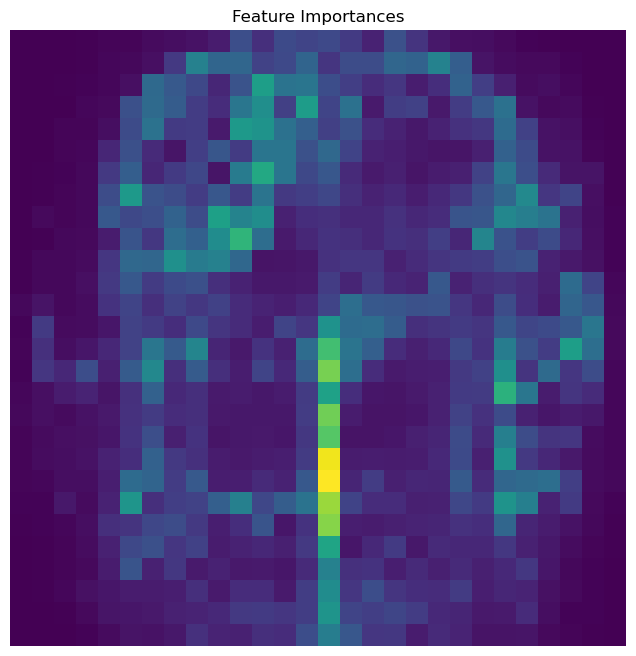

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Get feature importances
importances = clf.feature_importances_

# Reshape importances to the shape of the images
importances_image = importances.reshape(28, 28)

# Create a heatmap of feature importances
plt.figure(figsize=(8, 8))
plt.imshow(importances_image, cmap='viridis')
plt.title("Feature Importances")
plt.axis('off')

# Save the feature importances image to a file
plt.savefig("feature_importances.png")
plt.show()


---
### 14.  
A. Fit several models: 
* A random forest (model from (13.) is sufficient)
* One of KNN, decision tree, naive Bayes, logistic regression, or svm (a model from previous lab is sufficient if you fit one)
* Another model such as extra-random trees, boosting, or anything different from the previous two models
 

B. Next, try to combine these into an ensemble that outperforms each individual classifier on the `test` set, using soft or hard voting. 

C. Once you have found one, try it on the `final_test` set. How much better does it perform compared to the individual classifiers? 



In [29]:
# A. 

#Fitting KNN Model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Extra Random Trees Classifer
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra_trees.fit(X_train, y_train)


ExtraTreesClassifier(random_state=0)

In [30]:
# B. Create an ensemble

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('random_forest', clf),  # Your Random Forest model from Step 13
    ('knn', knn),
    ('extra_trees', extra_trees)
], voting='soft')

ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('extra_trees',
                              ExtraTreesClassifier(random_state=0))],
                 voting='soft')

In [31]:
# C. trying it on final_test. Compare.

from sklearn.metrics import accuracy_score

# Evaluate the ensemble on the test set
y_test_pred = ensemble.predict(X_test)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred)
print(f"Ensemble Test Accuracy: {test_accuracy_ensemble:.2f}")

# Evaluate the ensemble on the final_test set
y_final_test_pred = ensemble.predict(X_final_test)
final_test_accuracy_ensemble = accuracy_score(y_final_test, y_final_test_pred)
print(f"Ensemble Final Test Accuracy: {final_test_accuracy_ensemble:.2f}")

# Compare the ensemble's performance with individual classifiers
# Calculate and compare accuracy for individual models on the test set
test_accuracy_rf = accuracy_score(y_test, clf.predict(X_test))
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
test_accuracy_extra_trees = accuracy_score(y_test, extra_trees.predict(X_test))


print(f"Random Forest Test Accuracy: {test_accuracy_rf:.2f}")
print(f"KNN Test Accuracy: {test_accuracy_knn:.2f}")
print(f"Extra Trees Test Accuracy: {test_accuracy_extra_trees:.2f}")



Ensemble Test Accuracy: 0.88
Ensemble Final Test Accuracy: 0.87
Random Forest Test Accuracy: 0.88
KNN Test Accuracy: 0.85
Extra Trees Test Accuracy: 0.88


The results show that the ensemble has an accuracy of .88 on the test set which is on par with the Random Forest model's accuracy. The ensemble test isn't overfitting and it's providing a consistent performance on the test set. On the final test set, the ensemble's accuracy is .87 which is close to the accuracy of the test set. this suggest that the ensemble is generalizing well to new, unseen data, which is a positive outcome. 

The ensemble's accuracy on the test set and final test set is competitive with the Random Forest model and Extra Trees model while providing better performance compared to KNN on both sets. Overall the ensemble is a balanced approach for this classification task, achieving similar accuracy to individual models and generalizing well to new data. 